In [1]:
import numpy as np

np.random.seed(0)

import pymc3 as pm

import matplotlib.pyplot as plt

# Helper functions

The `get_utility()` function takes in a guess `g`, a true price `price`, and the opponent's guess `p_bar` and returns the utility.

The `get_expected_utility()` function takes in a guess `g`, samples for the true price `price_samples`, and the opponent's guess `p_bar` and returns the approximated expected utility as the mean of utility across different price samples

In [2]:
def get_utility(g, price, p_bar):
    if g > price:
        return 0

    if g < p_bar:
        if p_bar < price:
            return 0

        return price

    return price


def get_expected_utility(g, price_samples, p_bar):
    utilities = np.array([get_utility(g, price, p_bar) for price in price_samples])

    return utilities.mean()

# Sampling from the belief for the true price

In [3]:
with pm.Model() as price_model:
    p = pm.Normal("p", mu=100, sd=10)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


# Computing the expected utility as a function of the decision

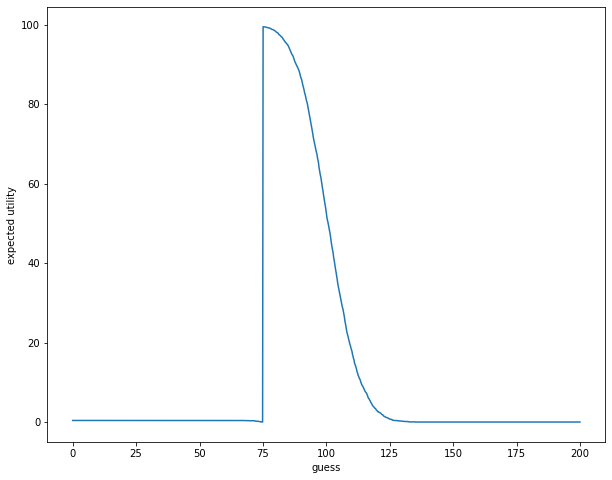

In [4]:
p_bar = 75

guesses = np.linspace(0, 200, 1000)

expected_utilities = np.array(
    [get_expected_utility(g, trace["p"], p_bar) for g in guesses]
)

fig = plt.figure(figsize=(10, 8))

plt.plot(guesses, expected_utilities)

plt.xlabel("guess")
plt.ylabel("expected utility")

plt.show()